<a href="https://colab.research.google.com/github/massirism/ML-UNS/blob/main/TP3_Massiris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ejercicio 3.1**

In [113]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

Ingrese la cantiad de valores a analizar: 200


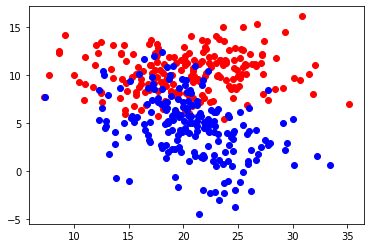

In [114]:
#Creo los conjuntos de datos
N=int(input("Ingrese la cantiad de valores a analizar: "))
centroide1 = [20,10]
var1_x = 25     #varianza es cuadrado del desvio estandar, aca seria desvio=3
var1_y = 4      #desvio=2
covar1 = 1      #el factor de correlacion es cov/producto de desvios (no varianzas)
matrizcovar1 =([var1_x , covar1] , [covar1 , var1_y])
A = np.random.multivariate_normal(centroide1 , matrizcovar1 , size=N) #100 datos para el primer grupo

centroide2 = [20,5]
var2_x = 16     #recordar que varianza es cuadrado del desvio estandar, aca seria desvio=4
var2_y = 9      #desvio=3
covar2 = -3     #el factor de correlacion es cov/producto de desvios (no varianzas)
matrizcovar2 =([var2_x , covar2] , [covar2 , var2_y])
B = np.random.multivariate_normal(centroide2 , matrizcovar2 , size=N) #100 datos para el segundo grupo

#Grafico los datos
plt.figure()
plt.scatter(A[:,0],A[:,1],c= "red", marker="o")
plt.scatter(B[:,0],B[:,1],c= "blue", marker="o")

In [115]:
#Bien, ahora aprticiono el dataset en dos grupos. 
#Cojeré los 50 primeros de cada conjunto para entrenamiento
#Los otros 50 de cada grupo serán para validación.
m=int(N/2)
DatosEntrenamiento=np.concatenate((A[0:m],B[0:m]),axis=0)
DatosValidacion=np.concatenate((A[m:N+1],B[m:N+1]),axis=0)

print(len(DatosValidacion))
print(len(DatosEntrenamiento))

#Preparo las etiquetas
Etiquetas = np.concatenate((["A"]*(m),["B"]*(m)),axis=0)
#Tengo 50 etiquetas para "A" y los datos de "B".
print(len(Etiquetas))

200
200
200


In [116]:
k=int(input("Ingrese el número k: "))
KNN = KNeighborsClassifier(n_neighbors=k)
#Pongo a entrenar al modelo
KNN.fit(DatosEntrenamiento,Etiquetas)
#Calculo la exactitud
exactitud = KNN.score(DatosValidacion,Etiquetas)
print(exactitud)

Ingrese el número k: 10
0.855


In [117]:
print('Accuracy of K-NN classifier on training set:'+str(KNN.score(DatosEntrenamiento,Etiquetas)))
#Luego de varios intentos con n_neighbors = 10-->0.77 obtuve la mejor performance.

#Ahora pruebo con los datos de validación!
print('Accuracy of K-NN classifier on training set:'+str(KNN.score(DatosValidacion, Etiquetas)))
#Mejoró hasta tener 0.87.

Accuracy of K-NN classifier on training set:0.89
Accuracy of K-NN classifier on training set:0.855


Cambiar N, cambiar k y la covarianza.



1.   **Cambiar N:** Bajar N te baja la performance, pasa de 0.87 a 0.78. Si lo aumentas baja un poco no más la respuesta la que tenías antes. en mi caso fue de 0.87 a 0.855.
2.   **Cambiar k:**
      Al aumentar k después de 10 empieza a caer la performance, pasa lo mismo para valores menores a 10.
3.   **Cambiar medias:** Se hará más complicada la tarea del clasificador si las medias son más parecidas. Si se separan será mas sencilla su tarea. Pasa lo mismo al variar la variancia.  



# ***Ejercicio 3***

---
Sentiment analisys aplicado en un dataset de spotify.




In [118]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing



In [119]:
attributes_spotify = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBOM/data/attributes_spotify.csv")
#attributes_spotify.describe()

df=pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBOM/data/attributes_spotify.csv")
#print(df)

#Analizando los atributos no veo necesario los siguientes: song_title, artist,Unnamed: 0 y mode. Por ahora los saco después los vuelvo a meter si mejoran la performance del modelo.

df=df.drop(["song_title","artist","Unnamed: 0","mode"],axis=1)
#print(df)

#Ahora separo los datos de la variable que analizaré en función de los datos (target)
variables=["acousticness","danceability","duration_ms","energy","instrumentalness","key","liveness","loudness","speechiness","tempo","time_signature","valence"]
x,y=df[variables],df.target
#print(x,"\n\n\n")
#print(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

n_neighbors = 5
knn = KNeighborsClassifier(n_neighbors)
knn.fit(x_train, y_train)
print('Accuracy of K-NN classifier on training set:'+str(knn.score(x_train, y_train)))
#Luego de varios intentos con n_neighbors = 5-->0.81 obtuve la mejor performance. Empecé desde 7 y ahí tenía 0.78--->0.78 aumento y bajaba el performance.

#Ahora pruebo con los datos de validación!
print('Accuracy of K-NN classifier on training set:'+str(knn.score(x_test, y_test)))
#Con la validación obtuve 62%, probaré agregando las otras etiquetas que antes saqué.

#################################################   CODIGO BASURA SIGA EN LA SIGUIENTE CELDA    ############################################################################
#Bien, ahora separo en dos partes el df, sera 80 datos de entrenamiento y 20 de validación
#p_train = 0.80 # Porcentaje de train. Si se quisiera hacer una partición distinta solo se modifica esta variable.

#train = df[:int((len(df))*p_train)] 
#test = df[int((len(df))*p_train):]


#print("Ejemplos usados para entrenar: ", len(train))
#print("Ejemplos usados para test: ", len(test),"\n\n \n")
#print(train,"\n\n \n")
#print(test)


Accuracy of K-NN classifier on training set:0.8082010582010583
Accuracy of K-NN classifier on training set:0.6277227722772277


In [120]:
df=pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBOM/data/attributes_spotify.csv")
#print(df)

#Ahora el único atributo que sacaré será:Unnamed: 0.

df=df.drop(["Unnamed: 0"],axis=1)
#print(df)

#Con labelEncoder cuantizo varianles como el titulo de la canción y el artista.
le = preprocessing.LabelEncoder()
df['song_title'] = le.fit_transform(df['song_title'])
df['artist'] = le.fit_transform(df['artist'])

#Ahora separo los datos de la variable que analizaré en función de los datos (target)
variables=["acousticness","danceability","duration_ms","energy","instrumentalness","key","liveness","loudness","speechiness","tempo","time_signature","valence","mode","song_title","artist"]
x,y=df[variables],df.target
#print(x,"\n\n\n")
#print(y)

df.sample(10)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

n_neighbors = 5
knn = KNeighborsClassifier(n_neighbors)
knn.fit(x_train, y_train)
print('Accuracy of K-NN classifier on training set:'+str(knn.score(x_train, y_train)))
#Luego de varios intentos con n_neighbors = 5-->0.78 obtuve la mejor performance. Empecé desde 7 y ahí tenía 0.78--->0.78 aumento y bajaba el performance.

#Ahora pruebo con los datos de validación!
print('Accuracy of K-NN classifier on training set:'+str(knn.score(x_test, y_test)))
#Con la validación obtuve 60%, bajó el performance un 3% en ambos casos. Le sacaré el atitulo de la canción.

Accuracy of K-NN classifier on training set:0.7771164021164021
Accuracy of K-NN classifier on training set:0.598019801980198


In [121]:
#Mismo código pero sin el titulo

df=pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBOM/data/attributes_spotify.csv")
#print(df)

df=df.drop(["artist","Unnamed: 0"],axis=1)
#print(df)

#Con labelEncoder cuantizo varianles como el titulo de la canción y el artista.
le = preprocessing.LabelEncoder()
df['song_title'] = le.fit_transform(df['song_title'])

#Ahora separo los datos de la variable que analizaré en función de los datos (target)
variables=["acousticness","danceability","duration_ms","energy","instrumentalness","key","liveness","loudness","speechiness","tempo","time_signature","valence","mode","song_title"]
x,y=df[variables],df.target
#print(x,"\n\n\n")
#print(y)

df.sample(10)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

n_neighbors = 5
knn = KNeighborsClassifier(n_neighbors)
knn.fit(x_train, y_train)
print('Accuracy of K-NN classifier on training set:'+str(knn.score(x_train, y_train)))
#Luego de varios intentos con n_neighbors = 5-->0.80 obtuve la mejor performance. Empecé desde 7 y ahí tenía 0.78--->0.78 aumento y bajaba el performance.

#Ahora pruebo con los datos de validación!
print('Accuracy of K-NN classifier on training set:'+str(knn.score(x_test, y_test)))
#Con la validación obtuve 0.65, bajó el performance un 3% en ambos casos. Ya en este caso aumentó el valor de la validación

Accuracy of K-NN classifier on training set:0.7791005291005291
Accuracy of K-NN classifier on training set:0.6514851485148515


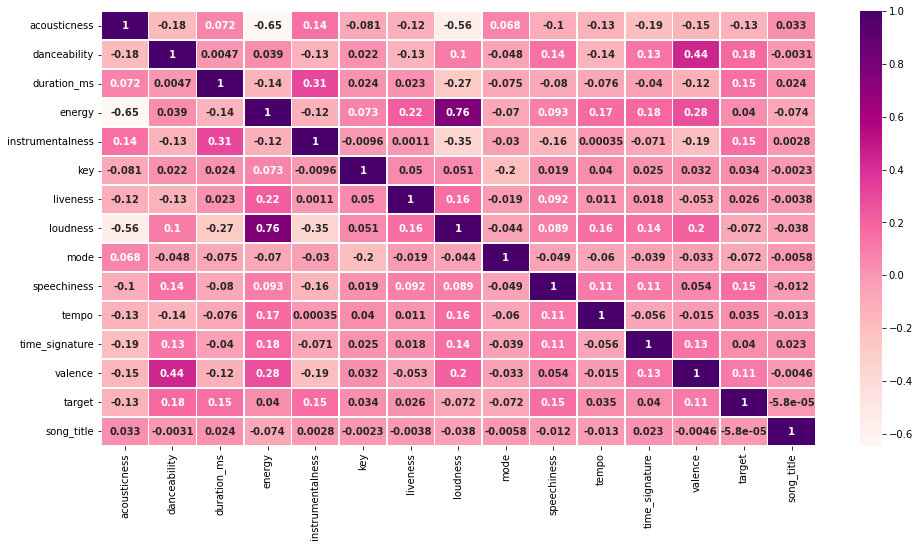

In [122]:
import matplotlib.pyplot as plot
import seaborn as sns
import matplotlib.ticker as ticker
corr = df.corr()
fig1 = plot.figure(figsize=(16, 8))
#El mapa de calor muestra un resumen de como se relacionan las variables entre sí.
sns.heatmap(df.corr(), annot=True, annot_kws={'weight':'bold'},linewidths=.5, cmap='RdPu')

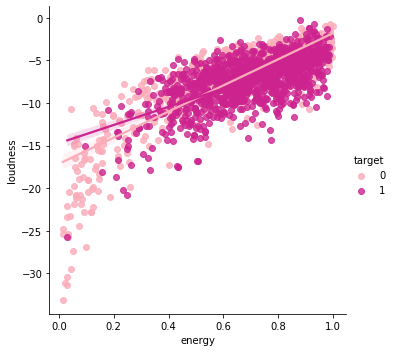

In [123]:
#Con esto puedo ver que tan relacionadas están variables como "loudness" y "energy", en este caso lo analicé un poco más a fondo porque tiene un 0.76 en el heatmap!
sns.lmplot(y='loudness',x='energy',data=df, hue='target',palette='RdPu')

In [124]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Ahrora confirmo la precisión viendo la matriz de confusión y el reporte sobre el conjunto de test. Lo que más me interesa es el valor de F1.
pred = knn.predict(x_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

#Al final F1 es del 65%, me gustaría llevarlo al 70%. Seguramente no es el mejor resultado.

[[184  68]
 [108 145]]
              precision    recall  f1-score   support

           0       0.63      0.73      0.68       252
           1       0.68      0.57      0.62       253

    accuracy                           0.65       505
   macro avg       0.66      0.65      0.65       505
weighted avg       0.66      0.65      0.65       505

